<a href="https://colab.research.google.com/github/kwansawanth/bggdata/blob/main/Project1_66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="300">

## Due Date: Sunday, October 1, 2023
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นางสาวกรวรรณ อู่จอหอ        643020495-5 <korrawan.o@kkumail.com>
2. นางสาวขวัญสวรรค์ ทองประเสริฐ 643020498-9 <kwansawan.t@kkumail.com>
3. นายธนบดี ภูชมศรี             643020502-4 <thanabodee.p@kkumail.com>
4. นายศิริโชค ศิริวิชา            643020522-8 sirichok.s@kkumail.com


**NOTE1**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost

**NOTE2**: Create a slide presentation once finished, convert to pdf format, and turn in by one group member only
<br>A list of documents to turn in: 1) Jupyter notebook containing results and 2) A set of slides in pdf format

In [1]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.
Most Twitter datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```

#### Read JSON file

In [2]:
# read the file
from google.colab import drive
drive.mount('/content/drive')
file = open('/content/drive/MyDrive/Big data 1 2566/thailand_tweets (1).txt','r') # rename
thailand_twt = file.read()
thai = json.loads(thailand_twt)
thai


Mounted at /content/drive


'{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography \\n@tombraider\\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider"

In [3]:
# inspect the file
type(thai)

str

In [27]:
df = pd.read_json(thai, orient ='index')

In [5]:
import pandas as pd

In [6]:
thai_json = json.loads(thai)
thai_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

In [28]:
thai_json.keys()

dict_keys(['1564764893038882816', '1564764866598080513', '1564764845685280772', '1564764710804897792', '1564764468277612549', '1564764445825458181', '1564764361742110720', '1564764274098323456', '1564764028014313472', '1564763907700531202', '1564763775403712513', '1564763746463105026', '1564763729967054848', '1564763679232405504', '1564763673662464003', '1564763553130655744', '1564763407818952705', '1564763389058027521', '1564763303989366784', '1564763292354355200', '1564763185244426240', '1564763141589897217', '1564763050477244417', '1564762341324992513', '1564762335192940544', '1564762170277052418', '1564762027507458049', '1564761944061382656', '1564761905410875392'])

In [8]:
first_key = list(thai_json.keys())[0]
thai_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

In [9]:
thai_json[first_key].keys()

dict_keys(['tweet_id', 'username', 'name', 'profile_picture', 'replies', 'retweets', 'likes', 'is_retweet', 'posted_time', 'content', 'hashtags', 'mentions', 'images', 'videos', 'tweet_url', 'link'])

In [10]:
thai_json[first_key]['tweet_id']

'1564764893038882816'

In [11]:
thai_json[first_key]['content']

'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

#### Pretty print json/dict object

In [12]:
pprint.pprint(thai_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In [13]:
import pandas as pd
from io import StringIO

In [14]:
df = pd.read_json(thai)


,2019-08-02 16:54:53.038882816,2019-08-02 16:54:26.598080513,2019-08-02 16:54:05.685280772,2019-08-02 16:51:50.804897792,2019-08-02 16:47:48.277612549,2019-08-02 16:47:25.825458181,2019-08-02 16:46:01.742110720,2019-08-02 16:44:34.098323456,2019-08-02 16:40:28.014313472,2019-08-02 16:38:27.700531202,...,2019-08-02 16:28:12.354355200,2019-08-02 16:26:25.244426240,2019-08-02 16:25:41.589897217,2019-08-02 16:24:10.477244417,2019-08-02 16:12:21.324992513,2019-08-02 16:12:15.192940544,2019-08-02 16:09:30.277052418,2019-08-02 16:07:07.507458049,2019-08-02 16:05:44.061382656,2019-08-02 16:05:05.410875392
tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,DiscoverSoc,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,Discover Society,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,https://twitter.com/DiscoverSoc/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
replies,2,0,0,1,0,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0


In [16]:
contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
print(contents)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand.  Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2 ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan… Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 top tweets
25182 retweets

https://etrenders.com/trendsetters/

In [17]:
tweetid = " ".join([thai_json[key]['tweet_id'] for key in thai_json.keys()])
print(tweetid)

1564764893038882816 1564764866598080513 1564764845685280772 1564764710804897792 1564764468277612549 1564764445825458181 1564764361742110720 1564764274098323456 1564764028014313472 1564763907700531202 1564763775403712513 1564763746463105026 1564763729967054848 1564763679232405504 1564763673662464003 1564763553130655744 1564763407818952705 1564763389058027521 1564763303989366784 1564763292354355200 1564763185244426240 1564763141589897217 1564763050477244417 1564762341324992513 1564762335192940544 1564762170277052418 1564762027507458049 1564761944061382656 1564761905410875392


In [18]:
import pandas as pd
import numpy as np



In [29]:
df

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


Possible approaches:
* In fact, `pandas` has `pandas.read_json(<file_dir>)` function to read json file into dataframe
* As we create a data dict, we can also read our data dict into a pandas dataframe

### Your report
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts
    * You are free to define your own popularity metric
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small
import library แล้วได้เสวิดคลาว เอาtextมาใส่ฟังก์ชันเวิดคลาวด์
เอาคอนเท้นของแต่ละทวีต เอามารวมกัน

##ข้อ1

In [30]:
total_tweets = df[['tweet_id','retweets']].count()
total_tweets


tweet_id    29
retweets    29
dtype: int64

##ข้อ2

In [38]:
first_tweet = list(thai_json.keys())[0]
thai_json[first_key]['content']


'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. '

In [24]:
# ----------------- Your code here -----------------



#codeข้อ1ทั้งหมด

report here
total_tweets = "29" 
The content of the first tweet is "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. "
Is the first tweet contained any hashtags is "[]" and Is the first tweet contained any mentions is "[]"
Collect all hashtags related to Thailand is [[['thailand', 'pattaya'], ['4', 'ohmpawat', 'ย'], ['pattaya', 'Thailand'], ['SDA2022', 'voteforppkritt', 'ppkritt'], ['เปกผล', 'PeckPaLitChoke'], ['LISA', 'LALISA', 'Money']]]
the most popular tweets with the largest number of retweet is
                                          tweet_id  \
2019-08-02 16:47:25.825458181  1564764445825458176   
2019-08-02 16:12:21.324992513  1564762341324992512   
2019-08-02 16:35:29.967054848  1564763729967054848   
2019-08-02 16:28:12.354355200  1564763292354355200   
2019-08-02 16:26:25.244426240  1564763185244426240   
2019-08-02 16:40:28.014313472  1564764028014313472   
2019-08-02 16:46:01.742110720  1564764361742110720   
2019-08-02 16

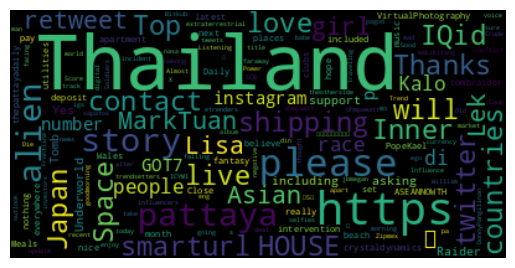

In [45]:
#-------Your code here----------
# 1
total_tweets = df['tweet_id'].count()
# 2
first_tweets = thai_json[first_key]['content']
# 3
hashtags = df['hashtags'][0]
mentions = df['mentions'][0]
#thai_json[first_tweet]['hashtags']
# 4
has_list = [[df['hashtags'][2],df['hashtags'][5],df['hashtags'][11],df['hashtags'][12],df['hashtags'][-4],df['hashtags'][-10]]]
# 5
metric = df[['tweet_id','name','username','retweets']]
five = metric.reindex().sort_values(by='retweets',ascending = False)
# 6
six = five.head(5)
# 7
contents = " ".join([thai_json[key]['content'] for key in thai_json.keys()])
my_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=my_stopwords).generate(contents)
print('report here')
print(f'total_tweets = "{total_tweets}" ')
print(f'The content of the first tweet is "{first_tweets}"')
print(f'Is the first tweet contained any hashtags is "{hashtags}" and Is the first tweet contained any mentions is "{mentions}"')
print(f'Collect all hashtags related to Thailand is {has_list}')
print('the most popular tweets with the largest number of retweet is')
print(five)
print('the top 5 tweets that are the most popular is')
print(six)
print('A word cloud of words in the contents')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Note: ไม่ต้องรายงานส่วนนี้ในสไลด์

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [25]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)

## Problem 3 Collect and Analyze Your Interesting Topic

* Select a topic that your group members are interested
* Gather url from at least 3 webpages
* Use urllib.request to retrieve data from webpage
* Clean and find intersting patterns and information
* Create a word cloud of your topic

##topic : Apple Inc.

In [66]:
import nltk
import urllib.request

In [68]:
apple = urllib.request.urlopen('https://en.wikipedia.org/wiki/Apple_Inc.')
steve_jobs = urllib.request.urlopen('https://www.biography.com/business-leaders/steve-jobs')
remember_stv = urllib.request.urlopen('https://allaboutstevejobs.com/persona/steve_at_work')
app = apple.read()
app_stv = steve_jobs.read()
app_rmb = remember_stv.read()

In [69]:
from bs4 import BeautifulSoup
s_apple = BeautifulSoup(app,'html5lib')
text_app = s_apple.get_text(strip = True)

In [70]:
from bs4 import BeautifulSoup
s_app_stv = BeautifulSoup(app_stv,'html5lib')
text_app_stv = s_app_stv.get_text(strip = True)

In [71]:
from bs4 import BeautifulSoup
s_app_rmb = BeautifulSoup(app_rmb,'html5lib')
text_app_rmb = s_app_rmb.get_text(strip = True)

##tokens

In [72]:
tokens_apple = [t for t in text_app.split()]
tokens_app_stv = [t for t in text_app_stv.split()]
tokens_app_rmb = [t for t in text_app_rmb.split()]

##remove stopwords

In [73]:
from nltk.corpus import stopwords

In [74]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
from PIL.PngImagePlugin import APNG_BLEND_OP_OVER
from nltk.corpus import stopwords
ap = stopwords.words('english')
print(len(ap))
ap.extend(['many', 'anyone','the','to','and','=','The','1,\n'])
print((len(ap)))

179
187


<ipython-input-91-0d91e2f1dd33>:1: DeprecationWarning: APNG_BLEND_OP_OVER is deprecated and will be removed in Pillow 10 (2023-07-01). Use Blend.OP_OVER instead.
  from PIL.PngImagePlugin import APNG_BLEND_OP_OVER


In [92]:
clean_tokens_app = tokens_apple[:]
# remove stop words
for token in tokens_apple:
    if token in ap:
        clean_tokens_app.remove(token)

In [93]:
clean_tokens_app_stv = tokens_app_stv[:]
# remove stop words
for token in tokens_app_stv:
    if token in ap:
        clean_tokens_app_stv.remove(token)

In [94]:
clean_tokens_app_rmb = tokens_app_rmb[:]
# remove stop words
for token in tokens_app_rmb:
    if token in ap:
        clean_tokens_app_rmb.remove(token)

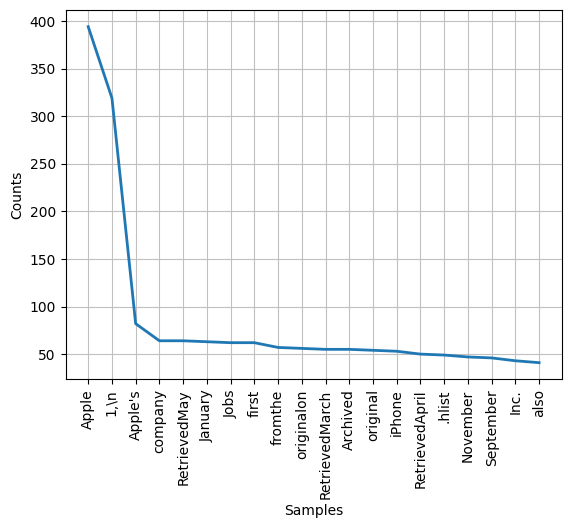

<Axes: xlabel='Samples', ylabel='Counts'>

In [95]:
fre_app = nltk.FreqDist(clean_tokens_app)
fre_app.plot(20, cumulative=False)

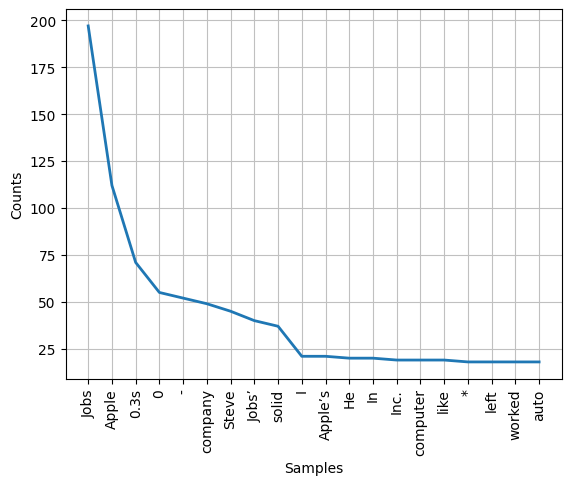

<Axes: xlabel='Samples', ylabel='Counts'>

In [96]:
fre_app_stv = nltk.FreqDist(clean_tokens_app_stv)
fre_app_stv.plot(20, cumulative=False)

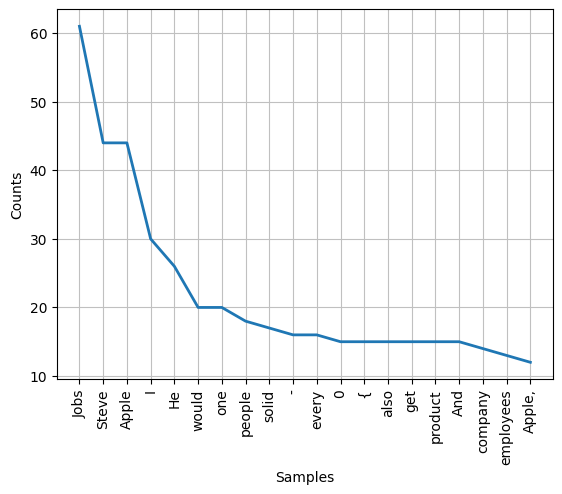

<Axes: xlabel='Samples', ylabel='Counts'>

In [97]:
fre_app_rmb = nltk.FreqDist(clean_tokens_app_rmb)
fre_app_rmb.plot(20, cumulative=False)

In [98]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
# create an object of class PorterStemmer
ps = PorterStemmer()
ls = LancasterStemmer()

In [99]:
for w in clean_tokens_app:
    clean_tokens_app_ste = ps.stem(w)

In [100]:
for w in clean_tokens_app_stv:
    clean_tokens_app_stv_ste = ps.stem(w)

In [101]:
for w in clean_tokens_app_rmb:
    clean_tokens_app_rmb_ste = ps.stem(w)

In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


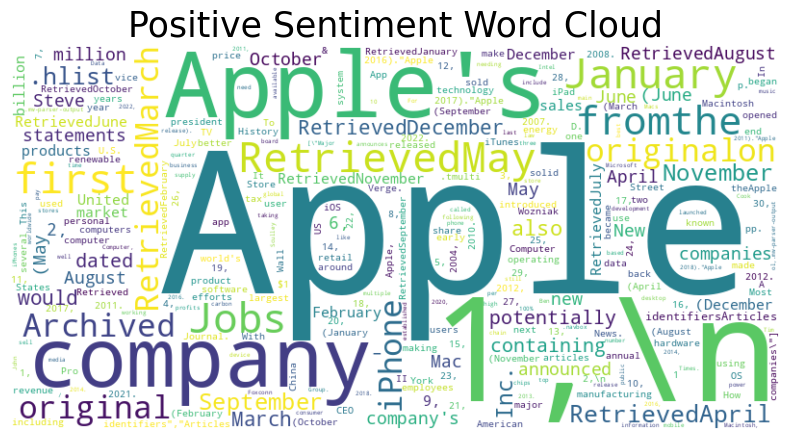

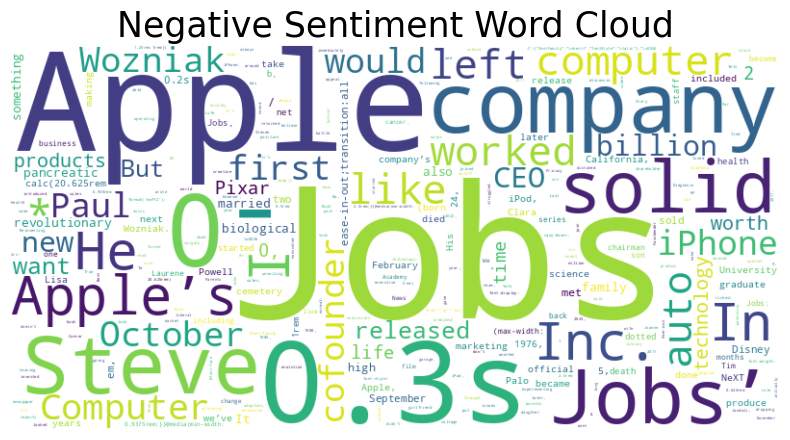

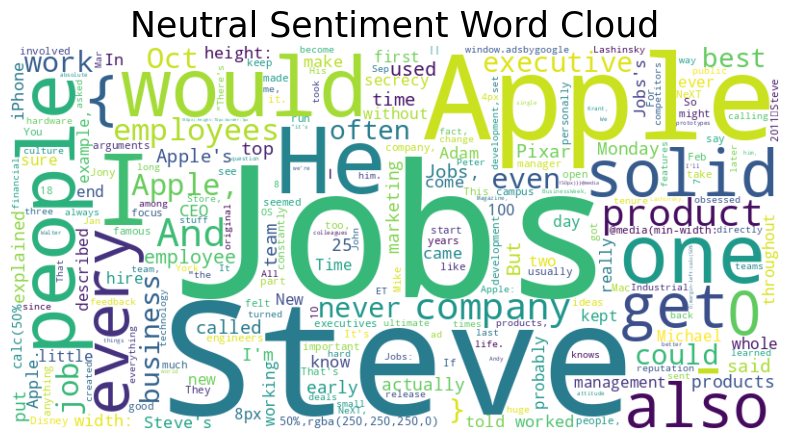

In [103]:
def generate_word_cloud(fre_app, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=300).generate_from_frequencies(fre_app)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()
generate_word_cloud(fre_app, 'Positive Sentiment Word Cloud')
generate_word_cloud(fre_app_stv, 'Negative Sentiment Word Cloud')
generate_word_cloud(fre_app_rmb, 'Neutral Sentiment Word Cloud')

In [26]:
#----------------------------------------------
# Your code starts here




### Report
* What did you find out about your topic? (please include figures or tables in the report, but no source code)

# ☃️ The End of Project 1 ☃️